In [35]:
from ioc2data import ioc2data
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import csv
import numpy as np
import glob
import os
from segmentos import segmentos
from matplotlib.dates import date2num
from utide import reconstruct,solve
from FunXSpectra import FunXSpectra
import matplotlib.ticker as mtick
from relleno_zeros import relleno_zeros


In [36]:
direccion_csv=r"C:\Users\ASUS\OneDrive - Universidad Técnica Federico Santa María\Memoria\Mareografos\Caldera2020"#direccion de guardado de los datos

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=cald&output=tab&period=30&endtime=2020-08-01
36636 datos.
Desde 2020-07-02 00:00:00 hasta 2020-08-01 00:00:00
cald_2020-07-02to2020-08-01.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=cald&output=tab&period=30&endtime=2020-07-02
41846 datos.
Desde 2020-06-02 00:00:00 hasta 2020-07-02 00:00:00
cald_2020-06-02to2020-07-02.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=cald&output=tab&period=30&endtime=2020-06-02
42366 datos.
Desde 2020-05-03 00:00:00 hasta 2020-06-02 00:00:00
cald_2020-05-03to2020-06-02.txt

http://www.ioc-sealevelmonitoring.org/bgraph.php?code=cald&output=tab&period=30&endtime=2020-05-03
42436 datos.
Desde 2020-04-03 00:00:00 hasta 2020-05-03 00:00:00
cald_2020-04-03to2020-05-03.txt



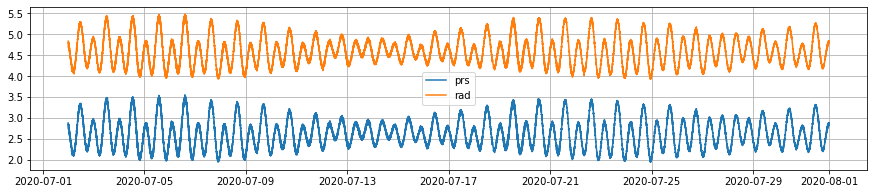

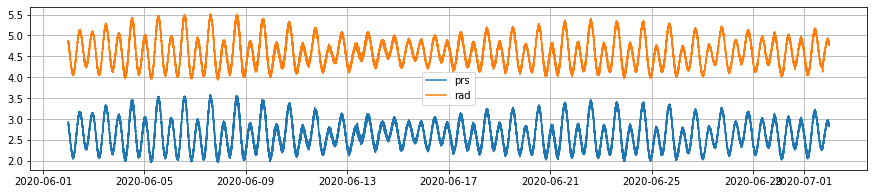

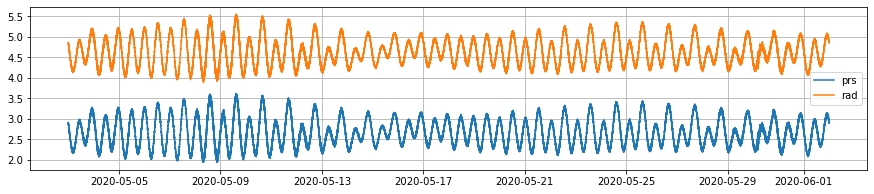

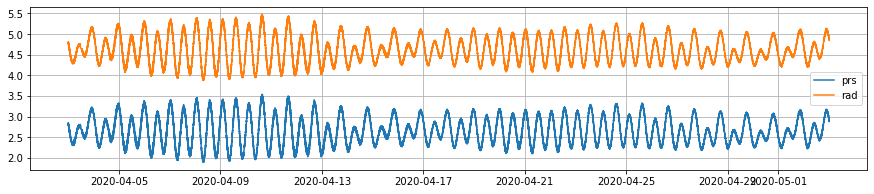

In [37]:
#extraer año completo y guardar como .txt
#aveces falla esta rutina ya que hay periodos seleccionados que no poseen datos 
ultima_fecha='2020-08-01'

ultima_fecha = dt.datetime.strptime(ultima_fecha, '%Y-%m-%d')
periodo=30 #dias a extraer (max 30)
code='cald' #codigo del mareografo
lat_mareografo=-27.0646055

tiempo_mes=[] #listas que guardaran la columna tiempo, prs y rad 
prs_mes=[]
rad_mes=[]

meses=4 #rango de meses (o iteraciones) a extraer desde la ultima fecha hacia atras 

for i in range(meses):
    endtime=ultima_fecha-dt.timedelta(seconds=float(periodo)*(i)*24*60*60) #la fecha de termino de la iteracion actual
    
    #generar URL
    url_generado='http://www.ioc-sealevelmonitoring.org/bgraph.php?code='+code+'&output=tab&period='+str(periodo)+'&endtime='+str(endtime.strftime("%Y-%m-%d"))
    print(url_generado)
    
    
    #generar nombre de archivo. ejemplo: 2019-09-06to2019-08-07.txt
    timestr1 = str((ultima_fecha-dt.timedelta(seconds=float(periodo)*i*24*60*60)).strftime("%Y-%m-%d"))
    timestr0 = str((ultima_fecha-dt.timedelta(seconds=float(periodo)*(i+1)*24*60*60)).strftime("%Y-%m-%d"))
    savename=code+'_'+timestr0+'to'+timestr1+'.txt'
    
    #extrae datos de la pagina
    tiempo,prs,rad=ioc2data(url_generado,1) #debe estar la funcion ioc2data en la misma carpeta que este archivo jupyter
    tiempo_mes.extend(list(tiempo)) #guarda las columnas tiempo, prs y rad en las listas vacias
    prs_mes.extend(list(prs))
    rad_mes.extend(list(rad))

    with open(os.path.join(direccion_csv,savename), 'w',newline='') as f:
        writer = csv.writer(f, delimiter='\t')
        writer.writerows(zip(tiempo_mes,prs_mes,rad_mes)) #guarda cada fila en el formato "tiempo prs rad"
    
    print(savename)
    tiempo_mes=[] #resetea las listas para la siguiente iteracion 
    prs_mes=[]
    rad_mes=[]
    print()   

In [38]:

#juntar series en una unica variable, no está compleeto ojo

for direccion_completa in glob.glob(os.path.join(direccion_csv,code+'*')):
    print(direccion_completa)
    
    #name=os.path.basename(direccion_completa)
    #print(name)

C:\Users\ASUS\OneDrive - Universidad Técnica Federico Santa María\Memoria\Mareografos\Caldera2020\Caldera.jpg
C:\Users\ASUS\OneDrive - Universidad Técnica Federico Santa María\Memoria\Mareografos\Caldera2020\cald_2020-04-03to2020-05-03.txt
C:\Users\ASUS\OneDrive - Universidad Técnica Federico Santa María\Memoria\Mareografos\Caldera2020\cald_2020-05-03to2020-06-02.txt
C:\Users\ASUS\OneDrive - Universidad Técnica Federico Santa María\Memoria\Mareografos\Caldera2020\cald_2020-06-02to2020-07-02.txt
C:\Users\ASUS\OneDrive - Universidad Técnica Federico Santa María\Memoria\Mareografos\Caldera2020\cald_2020-07-02to2020-08-01.txt
C:\Users\ASUS\OneDrive - Universidad Técnica Federico Santa María\Memoria\Mareografos\Caldera2020\cald_2020-09-02.txt


solve: matrix prep ... solution ... diagnostics ... done.
prep/calcs ... done.


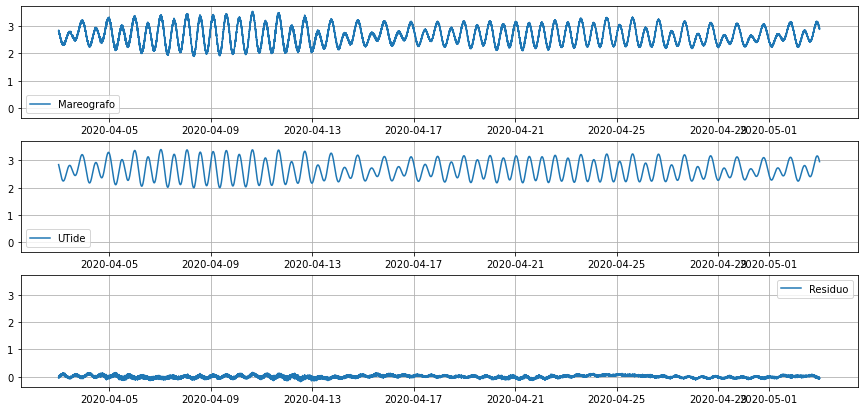

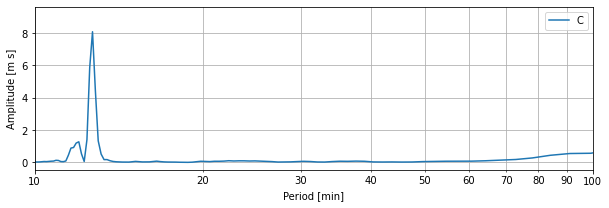

In [41]:
#mas pruebas de utide

#Utide
time=np.array(date2num(tiempo))
u=np.array(prs)

coef = solve(time, u,v=None,lat=lat_mareografo)
tide = reconstruct(time, coef)

#f,S1,S2,coh2,phase,bw=FunXSpectra(u-tide.h,u-tide.h,60,4,0)

fig1, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 7),sharey=True)

ax1.plot(tiempo, u,label='Mareografo')
ax1.legend(numpoints=1)
ax1.grid()

ax2.plot(tiempo, tide.h,label='UTide')
ax2.legend(numpoints=1)
ax2.grid()

ax3.plot(tiempo,u-tide.h,label='Residuo')
ax3.legend(numpoints=1)
ax3.grid()

fig4,ax4 = plt.subplots(figsize=(10,3))
plt.xlim(10,100)

utideh=relleno_zeros(u-tide.h)
f,S1,S2,coh2,phase,bw=FunXSpectra(utideh,utideh,1,6,0)
ax4.semilogx(1/f/60,S1)


ax4.legend('Caldera2020')
ax4.yaxis.grid(which="major")
ax4.xaxis.grid(which="both")
ax4.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax4.xaxis.set_minor_formatter(mtick.ScalarFormatter())
ax4.set_xlabel('Period [min]')
ax4.set_ylabel('Amplitude [m s]')


plt.show()